# CS2410 Group Project
### Topic: Analyze previous year home prices in LA
##### By Katherine Le and Miranda Rendon

In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load datasets
prices = pd.read_csv("./datasets/MedianPricesofExistingDetachedHomesHistoricalData.csv")
timeOnMarket = pd.read_csv("./datasets/MedianTimeonMarketofExistingDetachedHomesHistoricalData.csv")
unsoldInv = pd.read_csv("./datasets/UnsoldInventoryIndexofExistingDetachedHomesHistoricalData.csv")

In [3]:
# get LA data from each set in a new df
housingData = pd.DataFrame({
    'Mon-Yr' : prices['Mon-Yr'],
    'Median Price' : prices['Los Angeles'],
    'Median Time on Market' : timeOnMarket['LA'],
    'Unsold Inventory' : unsoldInv['Los Angeles']

})

# remove incomplete 2024 data
housingData = housingData.iloc[:-8]

# clean prices data and convert to numeric
housingData['Median Price'] = housingData['Median Price'].replace({'\\$':'',',':''}, regex=True)
housingData['Median Price'] = housingData['Median Price'].astype(int)

# save cleaned data into new file
housingData.to_csv('./datasets/LAHousinData.csv', index = False)

In [4]:
# modify data frame to be sorted by year over month/year
housingDataYears = pd.read_csv('./datasets/LAHousinData.csv')

# format year column 
housingDataYears['Mon-Yr'] = housingDataYears.iloc[:,0].str[-2:]
housingDataYears['Mon-Yr'] = "19" + housingDataYears['Mon-Yr']
housingDataYears['Mon-Yr'] = housingDataYears['Mon-Yr'].astype(int)

housingDataYears.loc[housingDataYears['Mon-Yr'] < 1990, 'Mon-Yr'] += 100 

# sorts and calculates average by year
avgHousingData = housingDataYears.groupby('Mon-Yr').mean()
avgHousingData = avgHousingData.round(3)

# save averaged data into new file
avgHousingData.to_csv('./datasets/AvgLAHousingData.csv')


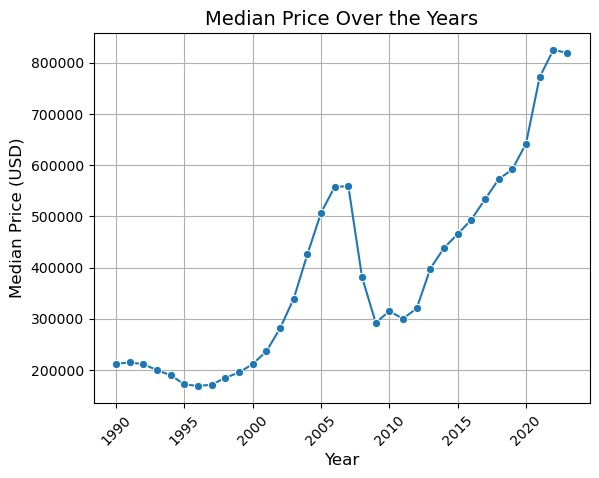

In [5]:
# create graph for median price over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Price', marker = 'o')

plt.title('Median Price Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price (USD)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)

plt.savefig('./graphs/MedianPriceOverYears.png', bbox_inches='tight')
plt.show()

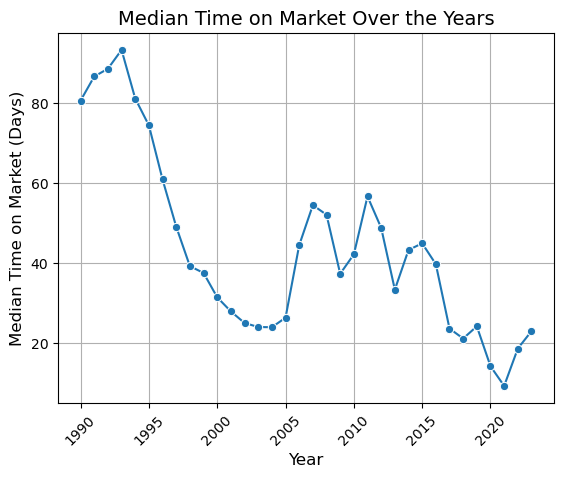

In [6]:
# create graph for median time on the market over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Time on Market', marker = 'o')

plt.title('Median Time on Market Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Time on Market (Days)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.savefig('./graphs/MedianTimeOnMarketOverTheYears.png', bbox_inches='tight')
plt.show()

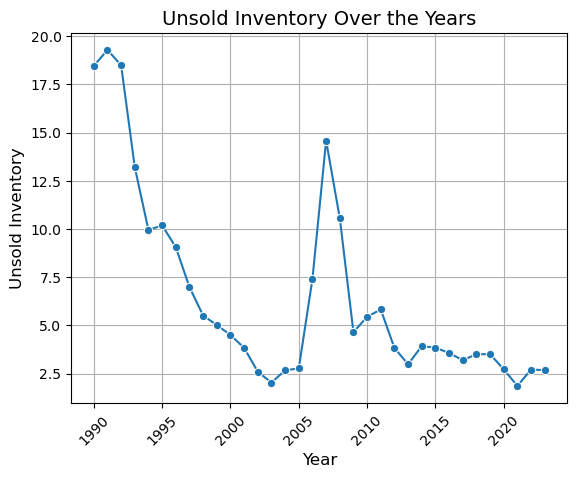

In [7]:
# create graph for unsold inventory over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Unsold Inventory', marker = 'o')

plt.title('Unsold Inventory Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unsold Inventory', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.savefig('./graphs/UnsoldInventoryOverTheYears.png', bbox_inches='tight')
plt.show()

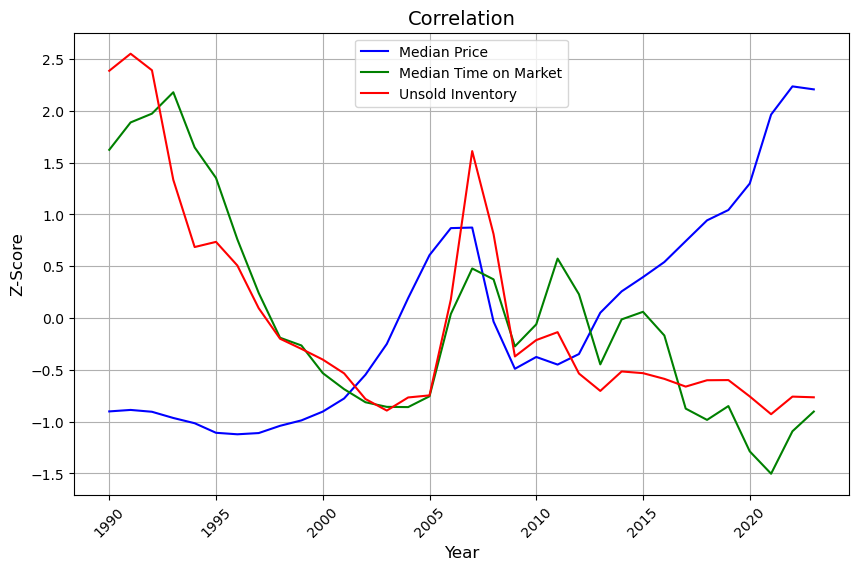

In [ ]:
# create correlation graph 
columns_to_scale = ['Median Price', 'Median Time on Market', 'Unsold Inventory']

# standardize using Z-score normalization
standardized_df = avgHousingData[columns_to_scale].apply(lambda x: (x - x.mean()) / x.std())

# plot the standardized data
plt.figure(figsize=(10, 6))
sns.lineplot(data=standardized_df, x=standardized_df.index, y='Median Price', label='Median Price', color='blue')
sns.lineplot(data=standardized_df, x=standardized_df.index, y='Median Time on Market', label='Median Time on Market', color='green')
sns.lineplot(data=standardized_df, x=standardized_df.index, y='Unsold Inventory', label='Unsold Inventory', color='red')

plt.title('Correlation', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc = 'upper center')

plt.savefig('./graphs/Correlation', bbox_inches='tight')
plt.show()

In [ ]:
# focus on 2005 - 2015
